<a href="https://colab.research.google.com/github/shiktr1785/isss-ai-python/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Metaheuristics for Traveling Salesman Problem
### Shikhar Mani Tripathi

The main objective of this assignment is to implement a metaheuristic algorithm in Python to solve the Traveling Salesman Problem (TSP). The TSP is an optimization problem that seeks to determine the most efficient route to visit each node exactly once and return to the starting point. This problem is recognized as a complex combinatorial challenge, as multiple solutions exist. Optimization involves analyzing all possible solutions that meet the constraints of the problem to identify the most optimal solution with the lowest resource cost.

>Metaheuristics are powerful tools for solving complex optimization problems, especially when traditional methods are infeasible or inefficient. Although they do not guarantee optimal solutions, they can often deliver high-quality solutions in a reasonable timeframe, making them invaluable in the industry. A key consideration in these algorithms is the trade-off between solution quality, computational cost, and parameter tuning.

For the Traveling Salesman Problem (TSP) optimization, there are four available options to choose from. In this case, I will be using a Genetic Algorithm to tackle the optimization challenge.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_cities(n_cities, range_min=0, range_max=100):

  # Generate random city coordinates within a given range.
  return np.random.uniform(range_min, range_max, size=(n_cities, 2))

In [3]:
def compute_distance_matrix(cities):

  # Compute the euclidian distance between the cities.

  n = len(cities)
  distance_matrix = np.zeros((n, n))

  for i in range(n):
    for j in range(i+1, n):
      dist = np.linalg.norm(cities[i] - cities[j])
      distance_matrix[i, j] = dist
      distance_matrix[j, i] = dist

  return distance_matrix

In [4]:
def evaluate_tour_cost(tour, distance_matrix):

  # Calculate the total cost for the distance of the tour.
  cost = 0

  for i in range(len(tour)):
    cost += distance_matrix[tour[i], tour[(i+1) % len(tour)]]
  return cost

## Genetic Algorithm

In [5]:
# @title Generating Initial Population

def generate_initial_population(pop_size, num_cities):

  population = []

  for _ in range(pop_size):
    tour = np.random.permutation(num_cities)
    population.append(tour)
  return population

In [6]:
# @title Fitness Evaluation

def evaluate_fitness(population, distance_matrix):

  fitness = []

  for tour in population:
    cost = evaluate_tour_cost(tour, distance_matrix)
    fitness.append(cost)
  return fitness

In [7]:
# @title Roulette Wheel Selection

def roulette_wheel_selection(population, fitness):

  # Selecting parent using roulette wheel selection
  fitness = np.array(fitness)
  probabilities = 1 / fitness
  probabilities /= probabilities.sum()

  # Select an individual based on probability
  selected_index = np.random.choice(len(population), p=probabilities)
  return population[selected_index]

In [8]:
# @title Crossover Order

def crossover(parent1, parent2):

  # Crossover between 2 parents
  num_cities = len(parent1)
  child = [-1] * num_cities

  # Crossover point
  start, end = sorted(np.random.choice(num_cities, size=2, replace=False))
  child[start:end + 1] = parent1[start:end + 1]

  # Filling the remaining cities from parent2

  current_index = 0

  for city in parent2:
    if city not in child:
      while child[current_index] != -1:
        current_index += 1
      child[current_index] = city

  return child

In [9]:
# @title Mutation (Swap Mutation)

def mutation(tour, mutation_rate=0.1):

  # Mutation with given rate
  mutated_tour = tour[:]

  for _ in range(int(len(tour) * mutation_rate)):
    i, j = np.random.choice(len(tour), size=2, replace=False)
    mutated_tour[i], mutated_tour[j] = mutated_tour[j], mutated_tour[i]
  return mutated_tour

In [10]:
# @title Main Loop: Genetic Algorithm

def genetic_algorithm(
    distance_matrix,
    num_cities,
    pop_size=5,
    generations=100,
    mutation_rate=0.1
):

  # Initilze Population and Evaluate Fitness
  population = generate_initial_population(pop_size, num_cities)
  fitness = evaluate_fitness(population, distance_matrix)

  best_fitness_per_generation = []
  all_population = []

  # Main Loop
  for generation in range(generations):
    new_population = []

    # Next Generation
    for _ in range(pop_size // 2):
      # Selection
      parent1 = roulette_wheel_selection(population, fitness)
      parent2 = roulette_wheel_selection(population, fitness)

      # Crossover
      child1 = crossover(parent1, parent2)
      child2 = crossover(parent2, parent1)

      # Mutation
      child1 = mutation(child1, mutation_rate)
      child2 = mutation(child2, mutation_rate)

      new_population.extend([child1, child2])

    # Evaluate new fitness
    population = new_population
    fitness = evaluate_fitness(population, distance_matrix)

    # Track fitness and population
    best_fitness_per_generation.append(min(fitness))
    all_population.append(population)

    # Print Progress
    best_fitness = min(fitness)
    print(f"Generation {generation + 1}: Best Fitness = {best_fitness:.2f}")

  # Find overall best solution
  overall_best_generation = np.argmin(best_fitness_per_generation)
  best_fitness = best_fitness_per_generation[overall_best_generation]
  best_population = all_population[overall_best_generation]

  best_index = np.argmin([evaluate_tour_cost(tour, distance_matrix) for tour in best_population])
  best_tour = best_population[best_index]

  return best_tour, best_fitness, best_fitness_per_generation

  # Return best solution
  #best_index = np.argmin(fitness)
  #return population[best_index], fitness[best_index], best_fitness_per_generation

## Plot and Visualisation

In [11]:
def plot_cities_and_tour(cities, tour):

  # Visualise cities and optional tour path

  plt.figure(figsize=(10,6))
  plt.scatter(cities[:, 0], cities[:, 1], color='blue', label='Cities')

  # Add labels to cities
  for i, (x, y) in enumerate(cities):
      plt.text(x, y, str(i), fontsize=12, color='red', ha='right', va='bottom')

  # If a tour is provided, plot the path
  if tour is not None:
    for i in range(len(tour) - 1):
      plt.plot([cities[tour[i], 0], cities[tour[i+1], 0]],
              [cities[tour[i], 1], cities[tour[i+1], 1]],
              color='red', linestyle='-', linewidth=2)

      # Add return to starting city

      plt.plot([cities[tour[-1]][0], cities[tour[0]][0]],
              [cities[tour[-1]][1], cities[tour[0]][1]],
              color='orange', linestyle='-', linewidth=2)

  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("TSP Cities and Optional Tour")
  plt.grid()
  plt.show()

## Driver Function

City 0: [72.02540101 86.46689947]
City 1: [58.13732422 57.52989907]
City 2: [84.15539032 53.38840178]
City 3: [12.28263474 27.84676451]
City 4: [89.68805825 76.69097863]
City 5: [51.05584971 23.06061903]
City 6: [36.05429069 70.15867467]
City 7: [58.47027964 58.80213275]
City 8: [71.7178711 74.3582671]
City 9: [22.36217139 92.86050711]

Distance Matrix:
 [[ 0.         32.0971754  35.23242328 83.69897457 20.18757264 66.783819
  39.49530319 30.8071523  12.112537   50.07309252]
 [32.0971754   0.         26.34562133 54.62363065 36.91335514 35.18918225
  25.43907119  1.31508093 21.6246439  50.28034829]
 [35.23242328 26.34562133  0.         76.27626255 23.95037583 44.89269422
  50.94072868 26.24944559 24.38087643 73.32427296]
 [83.69897457 54.62363065 76.27626255  0.         91.52790199 39.06749784
  48.53235382 55.60155901 75.47096921 65.79045361]
 [20.18757264 36.91335514 23.95037583 91.52790199  0.         66.09586226
  54.03010289 35.98000151 18.12095939 69.24036895]
 [66.783819   35.189

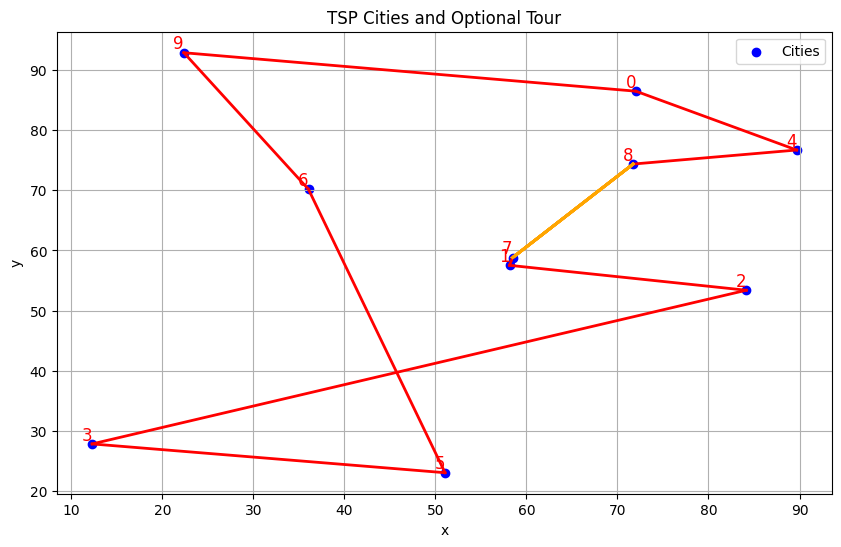

In [12]:
if __name__ == "__main__":

  # Generate Cities
  cities = generate_cities(10)
  for index, value in enumerate(cities):
    print(f"City {index}: {value}")

  # Compute distance matrix
  distance_matrix = compute_distance_matrix(cities)
  print("\nDistance Matrix:\n", distance_matrix, "\n")

  # Parameters
  pop_size = 5
  num_cities = len(cities)

  best_tour, best_cost, best_fitness_per_generation = genetic_algorithm(distance_matrix, num_cities, generations=100)
  print("\nBest Solution Found:")
  print(f"Tour: {best_tour}\n")
  print(f"Cost: {best_cost:.2f}\n")
  print(f"Level: {np.argmin(best_fitness_per_generation)}\n")
  plot_cities_and_tour(cities, best_tour)

In [33]:
# Generate initial Population
  population = generate_initial_population(pop_size, num_cities)
  print("\nInitial Population:\n", population)

  # Evalute fitness of the population
  fitness = evaluate_fitness(population, distance_matrix)
  print("\nFitness:\n", fitness)

  #output of initial population and fitness score
  for i, (tour, cost) in enumerate(zip(population, fitness)):
    print(f"Tour {i+1}: {tour} - Cost: {cost:.2f}")
    plot_cities_and_tour(cities, tour)


  selection = roulette_wheel_selection(population, fitness)
  print("\nSelected Tour:\n", selection)
  plot_cities_and_tour(cities, selection)

IndentationError: unexpected indent (<ipython-input-33-ca089f5fcea0>, line 2)

In [24]:
# Test selection and crossover
parent1 = population[0]
parent2 = population[4]
print("Parent 1:", parent1)
print("Parent 2:", parent2)


child1 = crossover(parent1, parent2)
#child2 = crossover(parent2, parent1)
print("\nChild 1:", child1)
#print("Child 2:", child2)

Parent 1: [6 5 4 2 7 0 3 1 8 9]
Parent 2: [9 2 3 6 0 5 1 8 7 4]

Child 1: [9, 3, 6, 2, 7, 0, 5, 1, 8, 4]


Parent 1: [9 2 3 6 0 5 1 8 7 4]
Parent 2: [8 2 0 4 7 1 5 9 3 6]


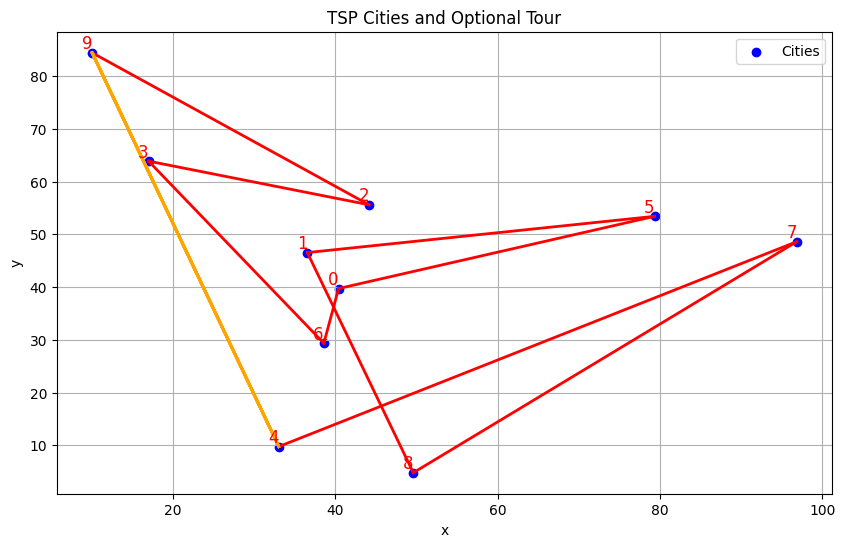

In [14]:
p1 = roulette_wheel_selection(population, fitness)
p2 = roulette_wheel_selection(population, fitness)
print("Parent 1:", p1)
print("Parent 2:", p2)
plot_cities_and_tour(cities, p1)

Child 1: [8, 2, 4, 6, 0, 5, 1, 7, 9, 3]
Child 2: [8, 2, 0, 4, 7, 1, 5, 9, 3, 6]


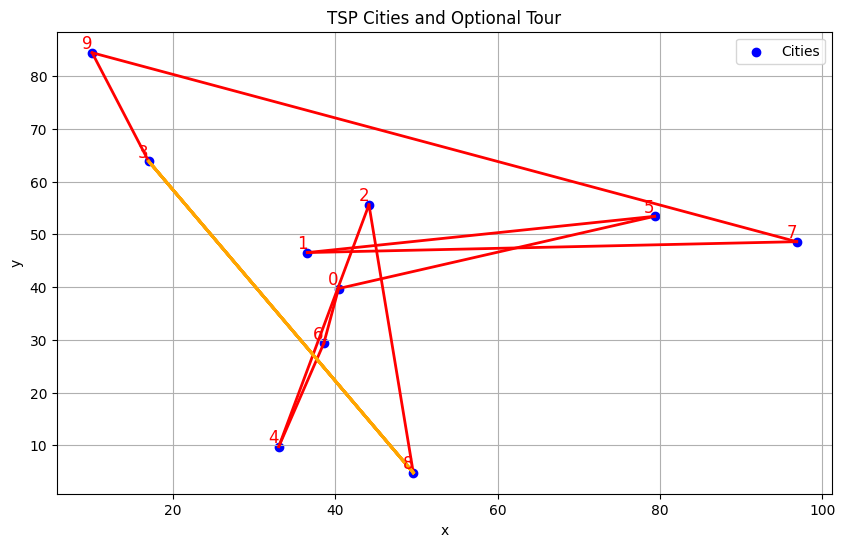

In [25]:
cross1 = crossover(p1, p2)
cross2 = crossover(p2, p1)
print("Child 1:", cross1)
print("Child 2:", cross2)
plot_cities_and_tour(cities, cross1)

Mutated Child: [8, 2, 4, 6, 0, 5, 9, 7, 1, 3]


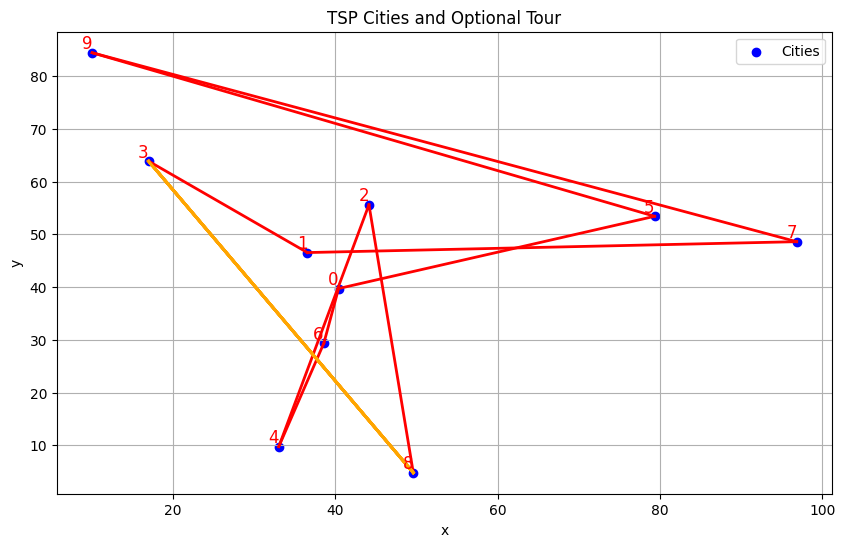

In [26]:
mute = mutation(cross1, 0.1)
print("Mutated Child:", mute)
plot_cities_and_tour(cities, mute)

In [28]:
best_tour, best_cost, best_fitness_per_generation = genetic_algorithm(distance_matrix, num_cities, generations=100)
print("\nBest Solution Found:")
print(f"Tour: {best_tour}")
print(f"Cost: {best_cost:.2f}")
print(f"Level: {np.argmin(best_fitness_per_generation)}")

Generation 1: Best Fitness = 455.04
Generation 2: Best Fitness = 426.54
Generation 3: Best Fitness = 414.83
Generation 4: Best Fitness = 425.68
Generation 5: Best Fitness = 426.13
Generation 6: Best Fitness = 414.19
Generation 7: Best Fitness = 351.63
Generation 8: Best Fitness = 304.45
Generation 9: Best Fitness = 342.74
Generation 10: Best Fitness = 311.37
Generation 11: Best Fitness = 353.43
Generation 12: Best Fitness = 398.49
Generation 13: Best Fitness = 355.25
Generation 14: Best Fitness = 359.32
Generation 15: Best Fitness = 368.38
Generation 16: Best Fitness = 369.67
Generation 17: Best Fitness = 413.06
Generation 18: Best Fitness = 471.28
Generation 19: Best Fitness = 468.58
Generation 20: Best Fitness = 403.58
Generation 21: Best Fitness = 428.57
Generation 22: Best Fitness = 423.27
Generation 23: Best Fitness = 378.26
Generation 24: Best Fitness = 407.07
Generation 25: Best Fitness = 415.60
Generation 26: Best Fitness = 442.53
Generation 27: Best Fitness = 402.94
Generation

In [29]:
best = np.argmin(best_fitness_per_generation)
print(f"Best Level : {best}")
print(f"Best Fitness : {best_fitness_per_generation[best]}")

Best Level : 7
Best Fitness : 304.45142434023785


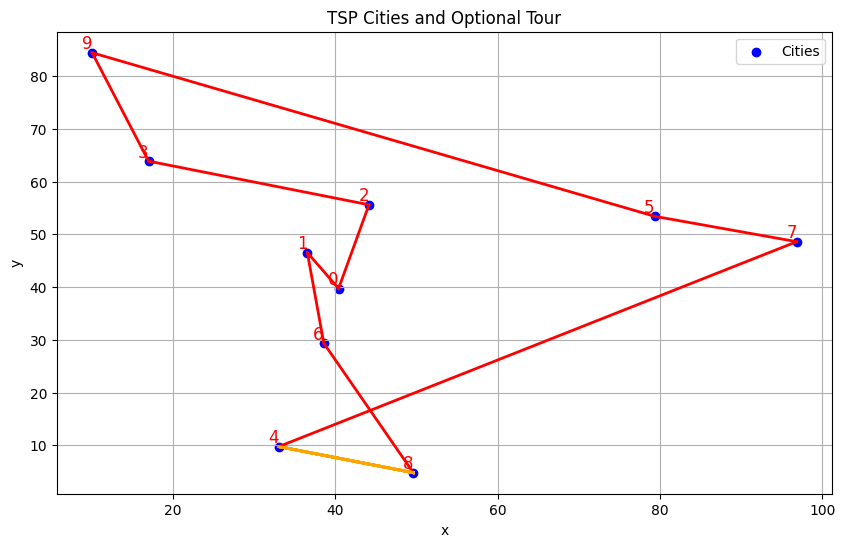

In [30]:
plot_cities_and_tour(cities, best_tour)

276.35220383295683


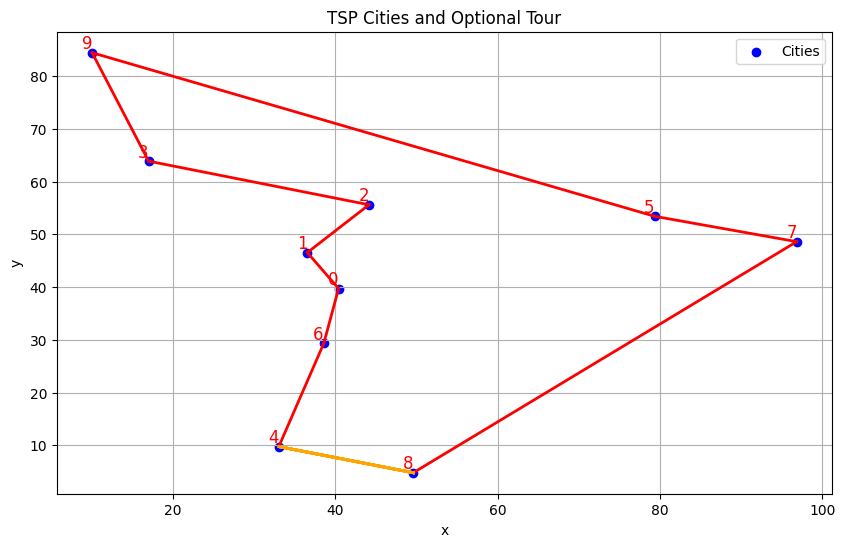

In [31]:
tour = [8,7,5,9,3,2,1,0,6,4]
print(evaluate_tour_cost(tour, distance_matrix))
plot_cities_and_tour(cities, tour)